# ML. Практика 1. Градиентный спуск

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def compute_hypothesis(X, theta):
    return np.matmul(X, theta)

In [4]:
def compute_cost(X, y, theta):
    m = X.shape[0]  # количество примеров в выборке
    return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)

In [5]:
def gradient_descend(X, y, theta, alpha, num_iter):
    history = list()

    m = X.shape[0]  # количество примеров в выборке

    for i in range(num_iter):
        theta_temp = theta.copy()
        theta_temp[0] = theta_temp[0] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, 0]) / m
        theta_temp[1] = theta_temp[1] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, 1]) / m
        theta = theta_temp

        history.append(compute_cost(X, y, theta))
    return history, theta

In [6]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)  # 1 - фиктивный признак X0
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [7]:
X, y = load_data('lab1data1.txt')

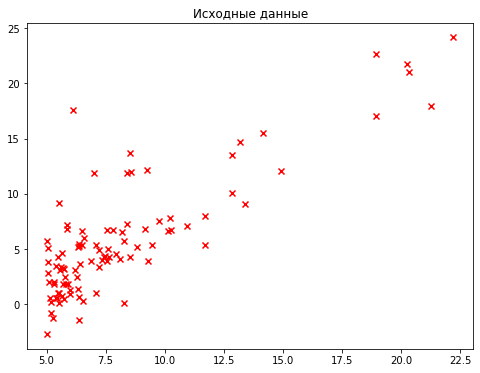

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Исходные данные')
plt.scatter(X[:, 1], y, c='r', marker='x')
plt.show()

In [9]:
print('Значение функции стоимости при theta = [0, 0]: ', compute_cost(X, y, np.array([0, 0])))

Значение функции стоимости при theta = [0, 0]:  32.072733877455654


In [10]:
history, theta = gradient_descend(X, y, np.array([0, 0], float), 0.01, 1500)

print('\nПосчитанные theta: ', theta)
print('Значение функции стоимости при новых theta: ', compute_cost(X, y, np.array(theta)))


Посчитанные theta:  [-3.63029144  1.16636235]
Значение функции стоимости при новых theta:  4.483388256587725


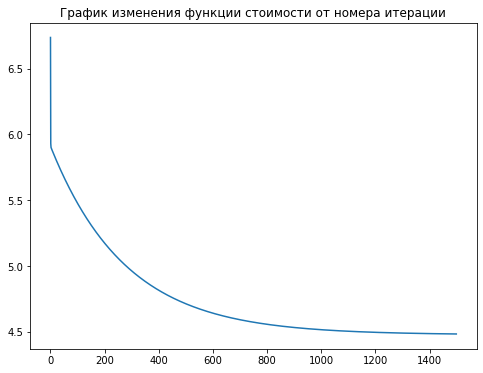

In [17]:
plt.figure(figsize=(8, 6))
plt.title('График изменения функции стоимости от номера итерации')
plt.plot(range(len(history)), history)
plt.show()

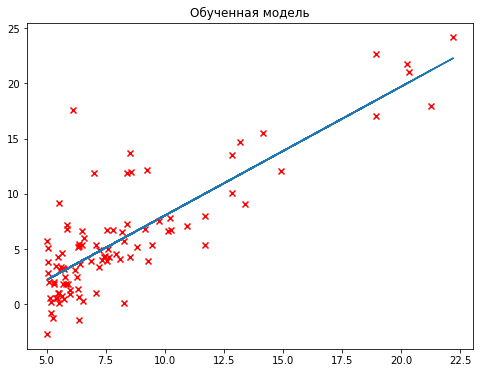

In [18]:
plt.figure(figsize=(8, 6))
plt.title('Обученная модель')
plt.scatter(X[:, 1], y, c='r', marker='x')
plt.plot(X[:, 1], compute_hypothesis(X, theta))
plt.show()